In [34]:
from utils import retrieve_latest_train_test, run_grid_search_cv, save_results_and_session, load_latest_session
from gscv_configs import gscv_cfg_rf

# This notebook applies RandomForestClassifier
name = gscv_cfg_rf.name


In [35]:
# load data
train, test = retrieve_latest_train_test()

# run
_gscv, pred = run_grid_search_cv(
    gscv_dct=gscv_cfg_rf,
    X_train=train.drop(["Survived"], axis=1),
    y_train=train["Survived"],
    X_test=test.drop(["Survived"], axis=1),
    )

# save results
save_results_and_session(name, _gscv.__dict__)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10, warm_start=True; total time=   0.1s


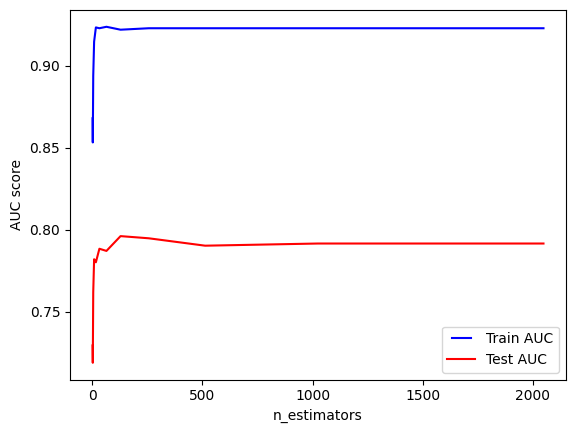

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

n_estimators = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
train_results = []
test_results = []
for estimator in n_estimators:

   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(train.drop(["Survived"], axis=1), train["Survived"])
   
   train_pred = rf.predict(train.drop(["Survived"], axis=1))
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train["Survived"], train_pred)
   
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(test.drop(["Survived"], axis=1))
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test["Survived"], y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

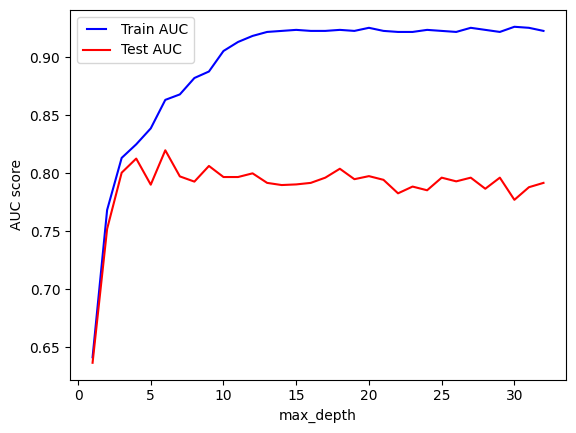

In [37]:
import numpy as np

max_depths = np.linspace(1, 32, 32, endpoint=True, dtype='int')

train_results = []
test_results = []
for max_depth in max_depths:

   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(train.drop(["Survived"], axis=1), train["Survived"])
   
   train_pred = rf.predict(train.drop(["Survived"], axis=1))
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train["Survived"], train_pred)
   
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(test.drop(["Survived"], axis=1))
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test["Survived"], y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

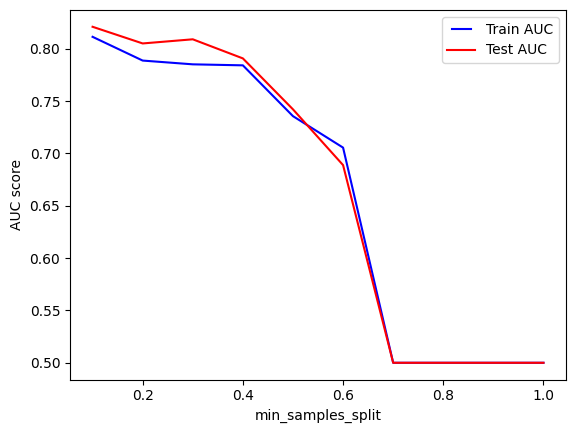

In [38]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:

   rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
   rf.fit(train.drop(["Survived"], axis=1), train["Survived"])
   
   train_pred = rf.predict(train.drop(["Survived"], axis=1))
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train["Survived"], train_pred)
   
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(test.drop(["Survived"], axis=1))
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test["Survived"], y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')

line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

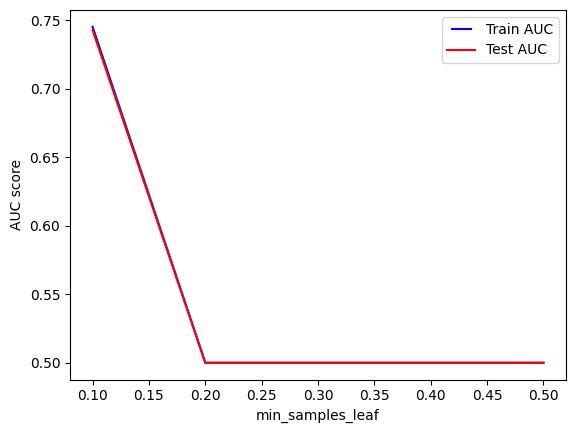

In [39]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:

   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1)
   rf.fit(train.drop(["Survived"], axis=1), train["Survived"])
   
   train_pred = rf.predict(train.drop(["Survived"], axis=1))
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train["Survived"], train_pred)
   
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(test.drop(["Survived"], axis=1))
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test["Survived"], y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')

line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

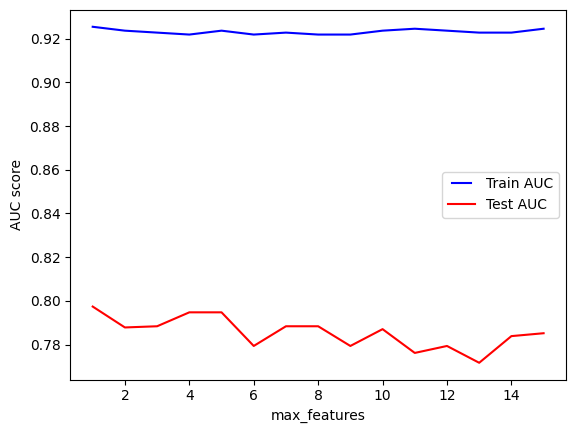

In [40]:
max_features = list(range(1,train.shape[1]))

train_results = []
test_results = []
for max_feature in max_features:

   rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
   rf.fit(train.drop(["Survived"], axis=1), train["Survived"])
   
   train_pred = rf.predict(train.drop(["Survived"], axis=1))
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train["Survived"], train_pred)
   
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(test.drop(["Survived"], axis=1))
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test["Survived"], y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')

line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

In [41]:
# load_latest_session(name)
